Usefull Imports

In [1]:
import subprocess as sub
import os

from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import random

Exercise 1

g1-1:
DFS: 1 2 4 5 6 3 
BFS: 1 3 2 6 5 4 

g1-2:
DFS: 1 2 4 5 6 3 
BFS: 1 3 2 6 5 4 

g1-3:
DFS: 1 2 3 6 5 8 7 4 
BFS: 1 4 2 8 6 3 7 5 

g1-4:
DFS: 1 2 3 7 8 6 4 5 
BFS: 1 5 4 2 8 6 3 7 

g1-5:
DFS: 1 2 4 8 3 6 7 9 5 
BFS: 1 5 3 2 6 4 9 7 8 

g1-6:
DFS: 1 2 4 7 6 9 8 3 5 
BFS: 1 5 3 2 7 6 4 9 8 

g1-7:
DFS: 1 4 13 12 0 8 9 2 3 10 11 5 6 7 
BFS: 1 7 5 4 8 13 6 9 12 3 0 11 10 2 

g1-8:
DFS: 1 2 5 14 6 7 8 3 10 11 12 4 9 13 
BFS: 1 13 9 4 3 2 14 10 8 12 11 6 5 7 



<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

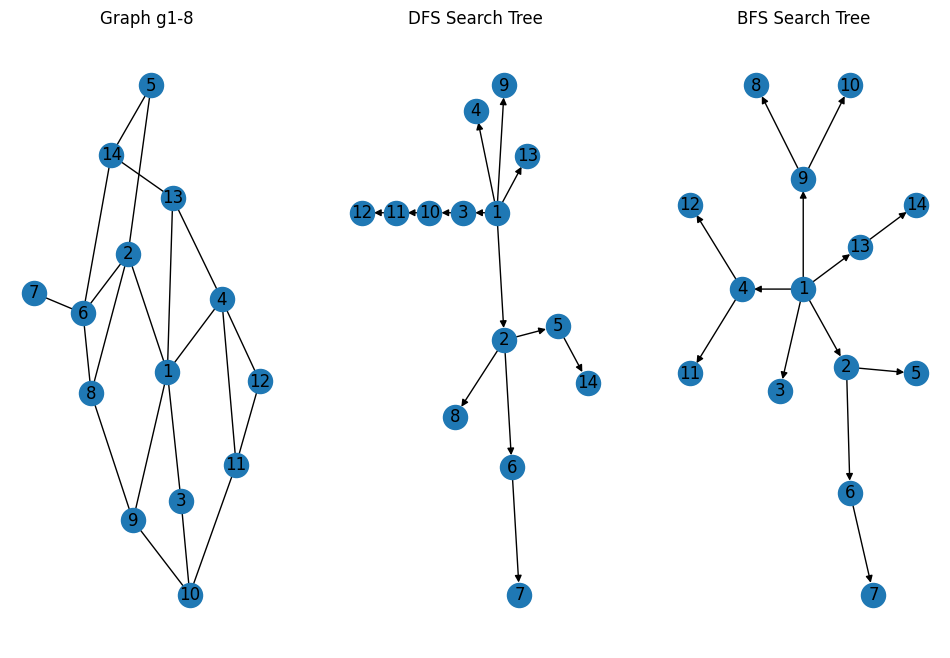

In [2]:
tests1_directory = 'tests/1'
result1_directory = 'results/ex1/'

for file in sorted(os.listdir(tests1_directory)):
    input = os.path.join(tests1_directory, file)
    filename_without_extension = input.rsplit('/')[-1].rsplit('.')[0]
    output = os.path.join(result1_directory, filename_without_extension + '.csv')
    output_image = os.path.join(result1_directory, filename_without_extension + '.png')
    
    print(filename_without_extension + ":")
    sub.run('./main.out 1 {} {}'.format(input, output), shell=True)
    print()

    df = pd.read_csv(output)

    split_indexes = df.index[df['source'].str.contains('source')]

    dfs = []
    start_index = 0
    for split_index in split_indexes:
        if start_index == 0:
            dfs.append(df.iloc[start_index:split_index])
        else:
            dfs.append(df.iloc[start_index+1:split_index])
        start_index = split_index
    dfs.append(df.iloc[start_index+1:])

    with open(input, 'r') as file:
        is_directed = (file.read(1) == 'D')
   
    if is_directed:
        input_graph = nx.from_pandas_edgelist(dfs[0], create_using=nx.DiGraph())
    else:
        input_graph = nx.from_pandas_edgelist(dfs[0], create_using=nx.Graph())

    dfs_search_tree = nx.from_pandas_edgelist(dfs[1], create_using=nx.DiGraph())
    bfs_search_tree = nx.from_pandas_edgelist(dfs[2], create_using=nx.DiGraph())

    plt.clf()
    fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    
    pos = graphviz_layout(input_graph, root=1, prog="fdp")
    nx.draw(input_graph, pos=pos, ax=axs[0], with_labels=True)
    axs[0].set_title('Graph ' + filename_without_extension)

    pos = graphviz_layout(dfs_search_tree, root=1, prog="twopi")
    nx.draw(dfs_search_tree, pos=pos, ax=axs[1], with_labels=True)
    axs[1].set_title('DFS Search Tree')

    pos = graphviz_layout(bfs_search_tree, root=1, prog="twopi") 
    nx.draw(bfs_search_tree, pos=pos, ax=axs[2], with_labels=True)
    axs[2].set_title('BFS Search Tree')

    plt.savefig(output_image)

Exercise 2

In [3]:
tests2_directory = 'tests/2'
result2_directory = 'results/ex2/'

for file in sorted(os.listdir(tests2_directory)):
    input = os.path.join(tests2_directory, file)
    filename_without_extension = input.rsplit('/')[-1].rsplit('.')[0]
    output = os.path.join(result2_directory, filename_without_extension + '.csv')
    output_image = os.path.join(result2_directory, filename_without_extension + '.png')
    
    print(filename_without_extension + ":")
    sub.run('./main.out 2 {}'.format(input), shell=True)
    print()


g2a-1:
Given Graph Is DAG
Topological Order: 1 2 5 3 6 9 4 7 10 13 8 11 14 12 15 16 

g2a-2:
Given Graph Is DAG
Topological Order: 1 2 11 3 12 21 4 13 22 31 5 14 23 32 41 6 15 24 33 42 51 7 16 25 34 43 52 61 8 17 26 35 44 53 62 71 9 18 27 36 45 54 63 72 81 10 19 28 37 46 55 64 73 82 91 20 29 38 47 56 65 74 83 92 30 39 48 57 66 75 84 93 40 49 58 67 76 85 94 50 59 68 77 86 95 60 69 78 87 96 70 79 88 97 80 89 98 90 99 100 

g2a-3:
Given Graph Is DAG
Too Many Vertices To Write Out Topological Order

g2a-4:
Given Graph Is DAG
Too Many Vertices To Write Out Topological Order

g2a-5:
Given Graph Is DAG
Too Many Vertices To Write Out Topological Order

g2a-6:
Given Graph Is DAG
Too Many Vertices To Write Out Topological Order

g2b-1:
Given Graph Is Not DAG

g2b-2:
Given Graph Is Not DAG

g2b-3:
Given Graph Is Not DAG

g2b-4:
Given Graph Is Not DAG

g2b-5:
Given Graph Is Not DAG

g2b-6:
Given Graph Is Not DAG

g2c-7:
Given Graph Is DAG
Topological Order: 1 2 4 3 5 6 9 7 8 14 10 11 12 13 

g2c-8

Exercise 3

g3-1:
Components Number: 5
1: 1  = 16 
2: 2  = 11 10 
3: 4  = 8 9 7 6 
4: 4  = 15 14 13 12 
5: 5  = 5 4 3 2 1 

g3-2:
Components Number: 5
1: 1  = 107 
2: 24  = 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 
3: 36  = 28 22 21 27 33 34 35 29 23 17 16 15 14 20 26 32 13 19 25 31 37 38 39 40 41 42 36 30 24 18 12 11 10 9 8 7 
4: 40  = 106 105 104 103 102 101 100 99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 
5: 6  = 6 5 4 3 2 1 

g3-3:
Components Number: 5
1: 1
2: 200
3: 400
4: 400
5: 7

g3-4:
Components Number: 5
1: 1
2: 2400
3: 3600
4: 4000
5: 8

g3-5:
Components Number: 5
1: 1
2: 20000
3: 40000
4: 40000
5: 9

g3-6:

g3m-7:
Components Number: 1
1: 12  = 12 11 10 9 8 7 6 5 4 3 2 1 

g3m-8:
Components Number: 6
1: 2  = 5 9 
2: 1  = 8 
3: 4  = 10 6 7 3 
4: 4  = 4 13 12 2 
5: 1  = 1 
6: 1  = 11 



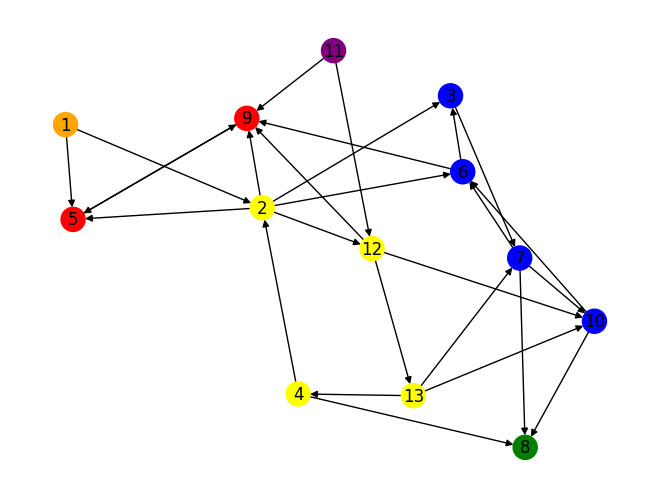

In [9]:
tests3_directory = 'tests/3'
result3_directory = 'results/ex3/'

for file in sorted(os.listdir(tests3_directory)):
    input = os.path.join(tests3_directory, file)
    filename_without_extension = input.rsplit('/')[-1].rsplit('.')[0]
    output = os.path.join(result3_directory, filename_without_extension + '.txt')
    output_image = os.path.join(result3_directory, filename_without_extension + '.png')
    
    print(filename_without_extension + ":")
    sub.run('./main.out 3 {} {}'.format(input, output), shell=True)
    print()

    if filename_without_extension not in ('g3-1', 'g3-2', 'g3m-7', 'g3m-8'):
        continue

    with open(input, "r") as f:
        lines = f.readlines()
        
    with open('tmp.csv', 'w') as f:
        f.write('source,target\n')
        for line in lines[3:]:
            edge = line.strip().split(' ')
            f.write(edge[0] + ',' + edge[1] + '\n')

    df = pd.read_csv('tmp.csv')
    graph = nx.from_pandas_edgelist(df, create_using=nx.DiGraph())
    pos = graphviz_layout(graph, root=1, prog="fdp")

    colors_dict = {
        1: 'red',
        2: 'green',
        3: 'blue',
        4: 'yellow',
        5: 'orange',
        6: 'purple',
        7: 'gray'
    }

    colors = { }

    with open(output, 'r') as file:
        for line in  file.readlines():
            elements = line.strip().split(' ')
            c = colors_dict[int(elements[0])]
            for i in elements[1:]:
                colors[int(i)] = {'color': c}

    node_colors = [colors[n]['color'] for n in graph.nodes()]
    plt.clf()
    nx.draw(graph, node_color=node_colors, pos=pos, with_labels=True)
    plt.savefig(output_image)
    

Exercise 4

d4a-1:
Graph Is Bipartie
White Vertices: 1 3 6 8 9 11 14 16 
Black Vertices: 2 4 5 7 10 12 13 15 

d4a-2:
Graph Is Bipartie
White Vertices: 1 3 5 7 9 12 14 16 18 20 21 23 25 27 29 32 34 36 38 40 41 43 45 47 49 52 54 56 58 60 61 63 65 67 69 72 74 76 78 80 81 83 85 87 89 92 94 96 98 100 
Black Vertices: 2 4 6 8 10 11 13 15 17 19 22 24 26 28 30 31 33 35 37 39 42 44 46 48 50 51 53 55 57 59 62 64 66 68 70 71 73 75 77 79 82 84 86 88 90 91 93 95 97 99 

d4a-3:
Graph Is Bipartie

d4a-4:
Graph Is Bipartie

d4a-5:
Graph Is Bipartie

d4a-6:
Graph Is Bipartie

d4b-1:
Graph Is Not Bipartie

d4b-2:
Graph Is Not Bipartie

d4b-3:
Graph Is Not Bipartie

d4b-4:
Graph Is Not Bipartie

d4b-5:
Graph Is Not Bipartie

d4b-6:
Graph Is Not Bipartie

dm-1:
Graph Is Bipartie
White Vertices: 1 2 5 7 10 11 14 17 
Black Vertices: 3 4 6 8 9 12 13 15 16 

dm-2:
Graph Is Not Bipartie

dm-3:
Graph Is Not Bipartie

dm-4:
Graph Is Not Bipartie

u4a-1:
Graph Is Bipartie
White Vertices: 1 4 5 6 7 
Black Vertices: 2 3 8 9 1

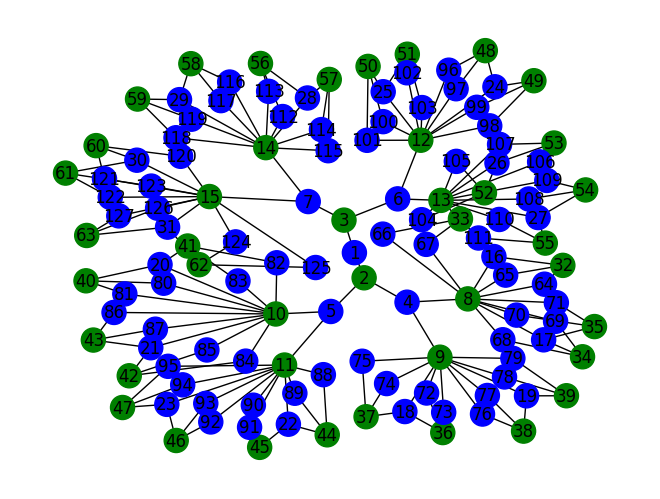

In [5]:
tests4_directory = 'tests/4'
result4_directory = 'results/ex4/'

for file in sorted(os.listdir(tests4_directory)):
    input = os.path.join(tests4_directory, file)
    filename_without_extension = input.rsplit('/')[-1].rsplit('.')[0]
    output = os.path.join(result4_directory, filename_without_extension + '.txt')
    output_image = os.path.join(result4_directory, filename_without_extension + '.png')
    
    print(filename_without_extension + ":")
    sub.run('./main.out 4 {} {}'.format(input, output), shell=True)
    print()

    with open(input, "r") as f:
        lines = f.readlines()
        
    with open('tmp.csv', 'w') as f:
        f.write('source,target\n')
        for line in lines[3:]:
            edge = line.strip().split(' ')
            f.write(edge[0] + ',' + edge[1] + '\n')

    with open(output, 'r') as f:
        is_bipartie = (f.read(1) == 'B')

        all_lines = f.readlines()[1:-1]
        if len(all_lines) > 200:
            continue

        if is_bipartie:
            node_dict = {}
            for index, line in enumerate(all_lines):
                if line.strip() == '1':
                    node_dict[index + 1] = {'color': 'blue'}
                else:
                    node_dict[index + 1] = {'color': 'green'}

            df = pd.read_csv('tmp.csv')
            graph = nx.from_pandas_edgelist(df, create_using=nx.Graph())
            pos = graphviz_layout(graph, root=1, prog="fdp")

            node_colors = [node_dict[n]['color'] for n in graph.nodes()]
            plt.clf()
            nx.draw(graph, node_color=node_colors, pos=pos, with_labels=True)

            plt.savefig(output_image)
        


Draw Graph

[]

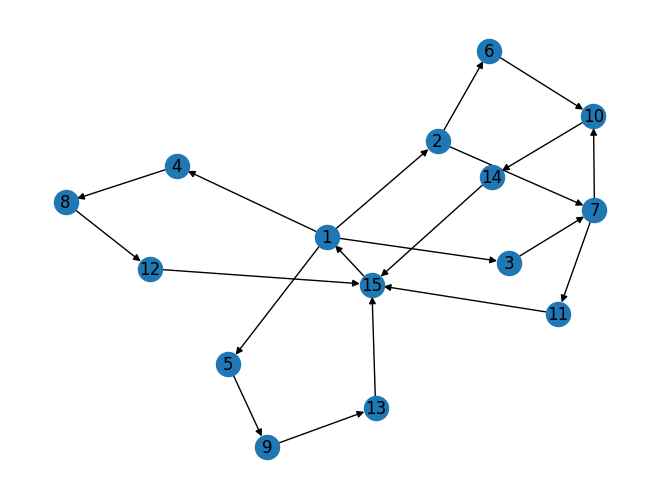

In [6]:
file = "tests/4/dm-4.txt"

with open(file, "r") as f:
    lines = f.readlines()
    
with open('tmp.csv', 'w') as f:
    f.write('source,target\n')
    for line in lines[3:]:
        edge = line.split(' ')
        f.write(edge[0] + ',' + edge[1] + '\n')

df = pd.read_csv('tmp.csv')
graph = nx.from_pandas_edgelist(df, create_using=nx.DiGraph())
nx.draw_kamada_kawai(graph, with_labels=True)

plt.plot()

Random DAG

In [7]:
G=nx.gnp_random_graph(14, 0.4, directed=True)
DAG = nx.DiGraph([(u + 1,v + 1) for (u,v) in G.edges() if u<v])

nx.write_edgelist(DAG, "dag.txt")
nx.is_directed_acyclic_graph(DAG)

True

Random No DAG

In [8]:
G=nx.gnp_random_graph(14, 0.2, directed=True)
while nx.is_directed_acyclic_graph(G):
    G=nx.gnp_random_graph(14, 0.4, directed=True)

G = nx.DiGraph([(u + 1,v + 1) for (u,v) in G.edges()])

nx.write_edgelist(G, "no-dag.txt")
nx.is_directed_acyclic_graph(G)

False